In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [ ]:
M=pd.read_csv("/content/dataset.csv") # loading the data

In [ ]:
M.round(2)

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_6m,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,...,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,1438.25,719.25,222.75,120.0,63.0,...,480.0,NaN,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,1574.033335,99.28,0.00,130.0,40.0,...,99750.0,4000.0,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,1577.899999,708.92,274.83,102.0,53.0,...,38000.0,38000.0,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,900.683333,739.67,0.00,147.0,89.0,...,150000.0,23000.0,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,1508.716667,737.50,232.75,125.0,62.0,...,12350.0,NaN,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,774.616667,19.50,0.00,73.0,20.0,...,5000.0,NaN,20220128.0,20220304.0,14.0,4.0,1.0,184750.0,124750.0,120000.0
9996,5970755,Male,xxx,24,T101,88.25,88.25,0.00,17.0,16.0,...,5000.0,5000.0,20220211.0,20220204.0,3.0,3.0,0.0,5400.0,5400.0,0.0
9997,6976589,Male,Damien,1,T101,477,185.25,15.00,103.0,60.0,...,7200.0,NaN,20220122.0,20220204.0,8.0,6.0,0.0,24300.0,15800.0,0.0
9998,15774287,Female,Julienne,0,IT2160,883.216667,508.47,186.90,138.0,72.0,...,1700.0,1100.0,20220206.0,20211223.0,2.0,1.0,0.0,16000.0,15000.0,0.0


# EDA

In [ ]:
M.head()

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_6m,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,...,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,1438.25,719.250000,222.750000,120.0,63.0,...,480.0,NaN,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,1574.033335,99.283334,0.000000,130.0,40.0,...,99750.0,4000.0,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,1577.899999,708.916666,274.833333,102.0,53.0,...,38000.0,38000.0,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,900.683333,739.666666,0.000000,147.0,89.0,...,150000.0,23000.0,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,1508.716667,737.500000,232.750000,125.0,62.0,...,12350.0,NaN,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0


In [ ]:
M.shape  # we have 1000 independent recordings over 39 features

(10000, 39)

In [ ]:
M.describe()

,uniqueID,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_6m,gsm_out_calls_qty_3m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_6m,...,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m
count,1.000000e+04,9.999000e+03,9.999000e+03,9998.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,8.621000e+03,7.232000e+03,9.965000e+03,9.982000e+03,9.982000e+03,9.982000e+03,9.982000e+03,9.982000e+03,9.982000e+03,9.982000e+03
mean,8.651012e+06,3.234774e+11,1.905508e+11,146.477242,57.043265,19.683257,1008.149983,554.970600,195.778900,6730.959004,...,5.041699e+04,3.567715e+04,1.801389e+07,1.779265e+07,3.727372e+05,4.070407e+03,6.080135e+03,2.940141e+05,1.982747e+05,7.363172e+04
std,5.240990e+06,1.629431e+13,1.099980e+13,1210.188715,69.983925,25.396787,1294.676826,727.681146,282.496309,24304.409406,...,1.195199e+05,9.515741e+04,6.300339e+06,6.571029e+06,2.719887e+06,2.862025e+05,3.505059e+05,2.229226e+06,2.313603e+06,1.014950e+06
min,7.797500e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.784713e+06,1.519750e+02,2.025000e+01,60.000000,31.000000,9.000000,179.000000,92.000000,24.000000,0.186772,...,5.000000e+03,2.900000e+03,2.022013e+07,2.022011e+07,2.000000e+00,1.000000e+00,0.000000e+00,3.900000e+03,1.300000e+03,0.000000e+00
50%,8.871795e+06,4.343167e+02,1.262500e+02,112.000000,59.000000,21.000000,564.000000,301.000000,98.000000,18.446777,...,1.450000e+04,1.000000e+04,2.022022e+07,2.022022e+07,7.000000e+00,4.000000e+00,1.000000e+00,2.650000e+04,1.335000e+04,2.400000e+03
75%,1.343819e+07,9.549583e+02,3.160250e+02,161.000000,83.000000,29.000000,1314.250000,738.000000,258.000000,2367.116498,...,5.000000e+04,3.000000e+04,2.022030e+07,2.022030e+07,1.900000e+01,1.000000e+01,3.000000e+00,1.137375e+05,6.155000e+04,1.800000e+04
max,1.645718e+07,8.675910e+14,6.351070e+14,100000.000000,5009.000000,1720.000000,18811.000000,10382.000000,3861.000000,990393.709500,...,2.000000e+06,2.000000e+06,2.022031e+07,2.022031e+07,2.022031e+07,2.022031e+07,2.022031e+07,1.068773e+08,1.689775e+08,8.324050e+07


In [ ]:
M.info(verbose=True) # viewing all details of variables, number of recordings and other hidden informations 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uniqueID                     10000 non-null  int64  
 1   gender                       9794 non-null   object 
 2   FirstName                    9985 non-null   object 
 3   Last_Activity_GSM            10000 non-null  object 
 4   Device                       9998 non-null   object 
 5   gsm_nau_amt_6m               9805 non-null   object 
 6   gsm_nau_amt_3m               9999 non-null   float64
 7   gsm_nau_amt_1m               9999 non-null   float64
 8   gsm_active_days_qty_6m       9998 non-null   float64
 9   gsm_active_days_qty_3m       10000 non-null  float64
 10  gsm_active_days_qty_1m       10000 non-null  float64
 11  gsm_out_calls_qty_6m         10000 non-null  float64
 12  gsm_out_calls_qty_3m         10000 non-null  int64  
 13  gsm_out_calls_qty

# A one month customer analysis

In [ ]:
Month_one=M.drop(columns=["mom_deposit_amt_3m","mom_deposit_amt_6m","mom_deposit_qty_3m","mom_deposit_qty_6m","mom_received_max_amt_3m","mom_received_max_amt_6m","gsm_times_blocked_po_qty_3m","gsm_times_blocked_po_qty_6m","gsm_avg_topup_amt_3m","gsm_avg_topup_amt_6m","gsm_days_bund_less_2mb_3m","gsm_days_bund_less_2mb_6m","gsm_dat_vol_amt_3m","gsm_dat_vol_amt_6m","gsm_out_calls_qty_3m","gsm_out_calls_qty_6m","gsm_active_days_qty_3m","gsm_active_days_qty_6m","gsm_nau_amt_3m","gsm_nau_amt_6m"])

In [ ]:
Month_one # These are the recordings of customers for one month period

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_1m,gsm_active_days_qty_1m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_1m,gsm_last_bundle_purchase,gsm_days_bund_less_2mb_1m,gsm_avg_topup_amt_1m,mom_deposit_last_date,gsm_times_blocked_po_qty_1m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_1m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,222.750000,21.0,40,6.328480,NaN,NaN,120.000000,20220212.0,0.0,NaN,20211213.0,20220212.0,1.0,200.0
1,5997806,Female,Germaine,1,IT2160,0.000000,0.0,0,0.000000,20220107.0,0.0,NaN,20220304.0,0.0,4000.0,20220306.0,20220304.0,32.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,274.833333,18.0,96,0.007348,NaN,NaN,122.222222,20211202.0,0.0,38000.0,20220220.0,20211202.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,0.000000,30.0,291,5240.852014,20220307.0,1.0,172.871795,20220304.0,0.0,23000.0,20220212.0,20220304.0,4.0,198500.0
4,197622,Male,Innocent,1,T301,232.750000,19.0,98,0.000000,NaN,NaN,110.714286,20220220.0,0.0,NaN,20220101.0,20220220.0,5.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,0.000000,1.0,0,0.000259,NaN,NaN,NaN,20220304.0,0.0,NaN,20220128.0,20220304.0,1.0,120000.0
9996,5970755,Male,xxx,24,T101,0.000000,0.0,1,0.000000,NaN,0.0,NaN,20220204.0,0.0,5000.0,20220211.0,20220204.0,0.0,0.0
9997,6976589,Male,Damien,1,T101,15.000000,14.0,59,0.052959,NaN,NaN,111.538461,20220204.0,0.0,NaN,20220122.0,20220204.0,0.0,0.0
9998,15774287,Female,Julienne,0,IT2160,186.900000,22.0,231,0.181194,20211005.0,NaN,111.538461,20211223.0,0.0,1100.0,20220206.0,20211223.0,0.0,0.0


In [ ]:
Month_one.isnull().sum() # Total number of missing values in One-month customer data

uniqueID                          0
gender                          206
FirstName                        15
Last_Activity_GSM                 0
Device                            2
gsm_nau_amt_1m                    1
gsm_active_days_qty_1m            0
gsm_out_calls_qty_1m              0
gsm_dat_vol_amt_1m                0
gsm_last_bundle_purchase       6013
gsm_days_bund_less_2mb_1m      6315
gsm_avg_topup_amt_1m           1064
mom_deposit_last_date            18
gsm_times_blocked_po_qty_1m       1
mom_received_max_amt_1m        2768
mom_received_last_date           35
mom_deposit_last_date.1          18
mom_deposit_qty_1m               18
mom_deposit_amt_1m               18
dtype: int64

In [ ]:
Month_one_Non_null=Month_one.fillna(0)

# Filling with zero value in the missing value cells in a one month customer data

In [ ]:
Month_one_Non_null

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_1m,gsm_active_days_qty_1m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_1m,gsm_last_bundle_purchase,gsm_days_bund_less_2mb_1m,gsm_avg_topup_amt_1m,mom_deposit_last_date,gsm_times_blocked_po_qty_1m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_1m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,222.750000,21.0,40,6.328480,0.0,0.0,120.000000,20220212.0,0.0,0.0,20211213.0,20220212.0,1.0,200.0
1,5997806,Female,Germaine,1,IT2160,0.000000,0.0,0,0.000000,20220107.0,0.0,0.000000,20220304.0,0.0,4000.0,20220306.0,20220304.0,32.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,274.833333,18.0,96,0.007348,0.0,0.0,122.222222,20211202.0,0.0,38000.0,20220220.0,20211202.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,0.000000,30.0,291,5240.852014,20220307.0,1.0,172.871795,20220304.0,0.0,23000.0,20220212.0,20220304.0,4.0,198500.0
4,197622,Male,Innocent,1,T301,232.750000,19.0,98,0.000000,0.0,0.0,110.714286,20220220.0,0.0,0.0,20220101.0,20220220.0,5.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,0.000000,1.0,0,0.000259,0.0,0.0,0.000000,20220304.0,0.0,0.0,20220128.0,20220304.0,1.0,120000.0
9996,5970755,Male,xxx,24,T101,0.000000,0.0,1,0.000000,0.0,0.0,0.000000,20220204.0,0.0,5000.0,20220211.0,20220204.0,0.0,0.0
9997,6976589,Male,Damien,1,T101,15.000000,14.0,59,0.052959,0.0,0.0,111.538461,20220204.0,0.0,0.0,20220122.0,20220204.0,0.0,0.0
9998,15774287,Female,Julienne,0,IT2160,186.900000,22.0,231,0.181194,20211005.0,0.0,111.538461,20211223.0,0.0,1100.0,20220206.0,20211223.0,0.0,0.0


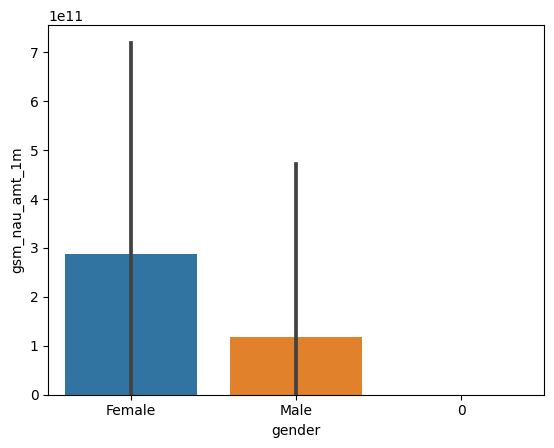

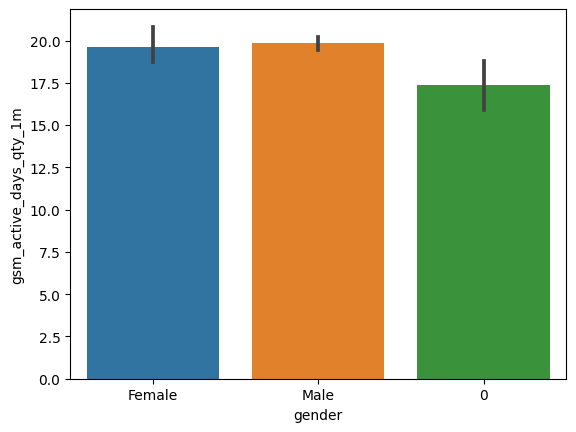

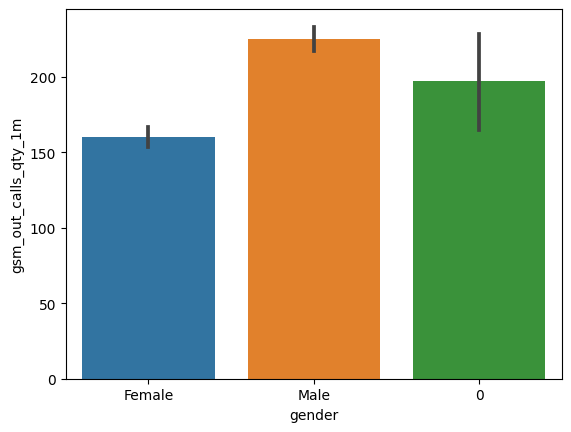

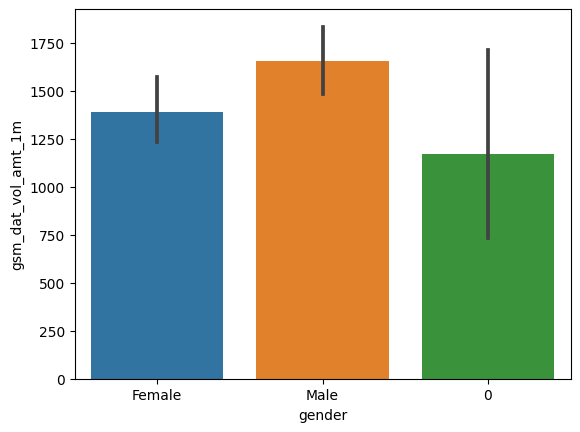

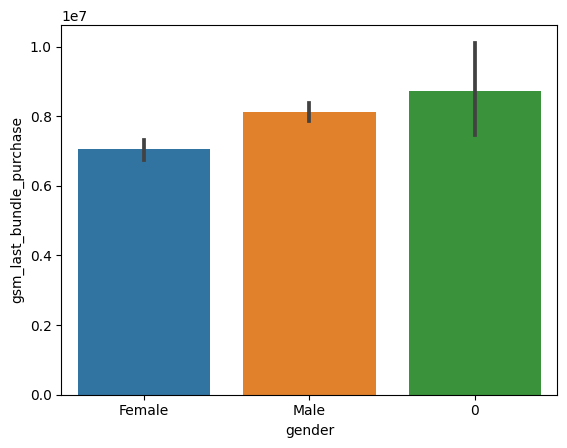

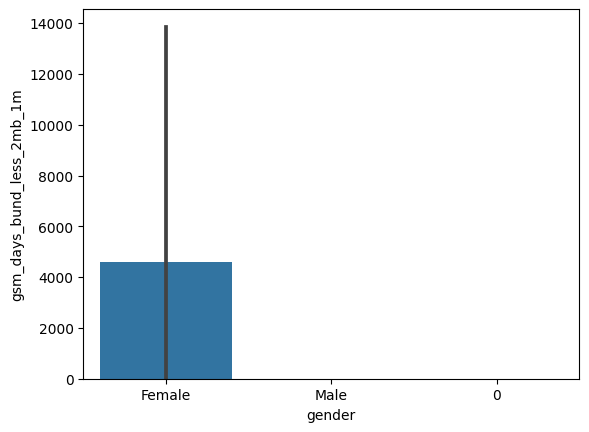

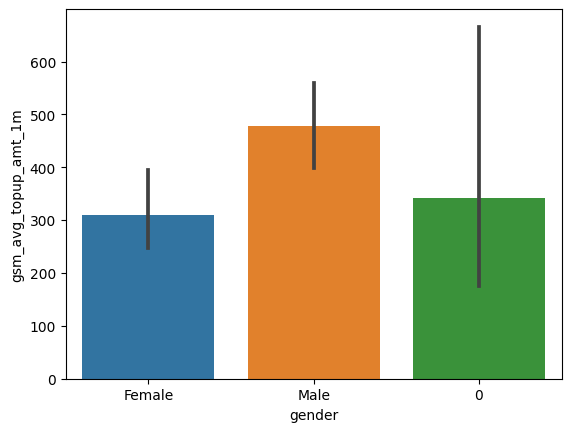

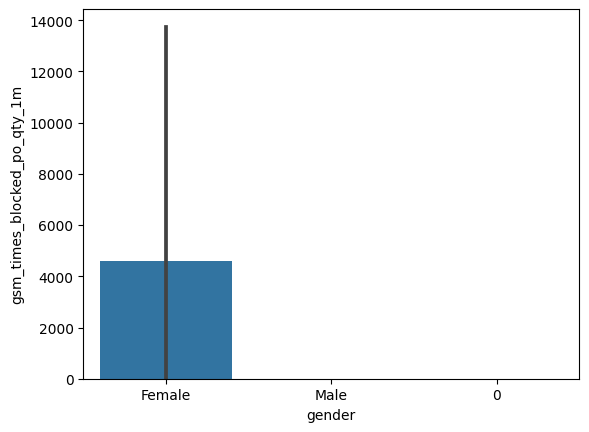

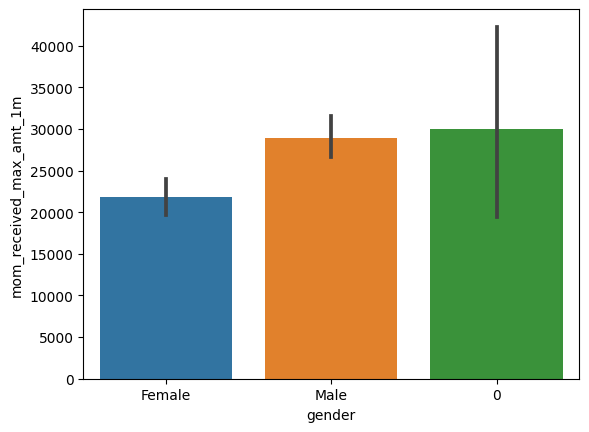

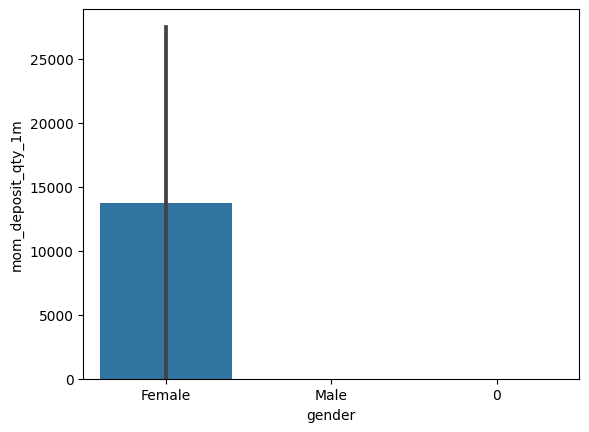

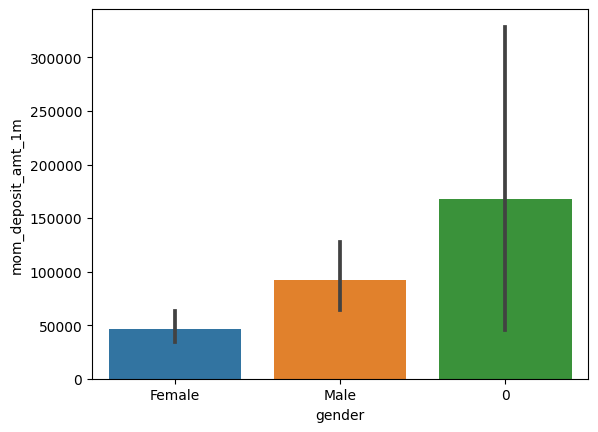

In [ ]:
# The influence of gender in monthly utilization of telecommunication services

Amounts=["gsm_nau_amt_1m","gsm_active_days_qty_1m","gsm_out_calls_qty_1m","gsm_dat_vol_amt_1m","gsm_last_bundle_purchase","gsm_days_bund_less_2mb_1m","gsm_avg_topup_amt_1m","gsm_times_blocked_po_qty_1m","mom_received_max_amt_1m","mom_deposit_qty_1m","mom_deposit_amt_1m"]

for i in Amounts:
    plt.figure(i)
    sns.barplot(data=Month_one_Non_null,x="gender",y=i)



In [ ]:
Out_calls= Month_one_Non_null.groupby(['gender', 'uniqueID','gsm_out_calls_qty_1m']).mean() 

Out_calls

gsm_nau_amt_1m  gsm_active_days_qty_1m  \
gender uniqueID gsm_out_calls_qty_1m                                           
0      82651    235                            57.00                    26.0   
       99945    34                            196.50                     7.0   
       162321   322                           498.00                    23.0   
       197773   168                           321.00                    23.0   
       215924   333                           174.00                    19.0   
...                                              ...                     ...   
Male   16452555 2                               6.75                     2.0   
       16453367 50                              0.00                     3.0   
       16453892 21                             99.95                     3.0   
       16456852 3                              48.50                     2.0   
       16457175 9                               0.00                     1.0   

                                      gsm_dat_vol_amt_1m  \
gender uniqueID gsm_out_calls_qty_1m                       
0      82651    235                             0.932645   
       99945    34                              0.000000   
       162321   322                             0.000000   
       197773   168                             0.003331   
       215924   333                             0.274891   
...                                                  ...   
Male   16452555 2                               0.000000   
       16453367 50                              0.000000   
       16453892 21                              0.000000   
       16456852 3                               0.123549   
       16457175 9                               0.000000   

                                      gsm_last_bundle_purchase  \
gender uniqueID gsm_out_calls_qty_1m                             
0      82651    235                                        0.0   
       99945    34                                         0.0   
       162321   322                                        0.0   
       197773   168                                        0.0   
       215924   333                                        0.0   
...                                                        ...   
Male   16452555 2                                          0.0   
       16453367 50                                         0.0   
       16453892 21                                         0.0   
       16456852 3                                          0.0   
       16457175 9                                          0.0   

                                      gsm_days_bund_less_2mb_1m  \
gender uniqueID gsm_out_calls_qty_1m                              
0      82651    235                                         0.0   
       99945    34                                          0.0   
       162321   322                                         0.0   
       197773   168                                         0.0   
       215924   333                                         3.0   
...                                                         ...   
Male   16452555 2                                           0.0   
       16453367 50                                          0.0   
       16453892 21                                          0.0   
       16456852 3                                           0.0   
       16457175 9                                           0.0   

                                      gsm_avg_topup_amt_1m  \
gender uniqueID gsm_out_calls_qty_1m                         
0      82651    235                             117.121212   
       99945    34                              107.500000   
       162321   322                             146.428571   
       197773   168                             153.571429   
       215924   333                             221.052632   
...                                                

In [ ]:
# Response variable creation


s=Month_one_Non_null.Last_Activity_GSM.values

d=list(s)

# Changing the value of "PREPAID" to "0"

for i in range(len(d)):
    if d[i]=="PREPAID":
        d[i]="0"
    
# Changing the status of string characters to numerical values


for j in range(len(d)):
    if d[j] in ["0","1","2","3","4","5","6","7"]:
        d[j]=1
    else:
        d[j]=0

#Generating an array of decision variable

Status=np.array(d)



In [ ]:

Mon=Month_one_Non_null.drop(columns="Last_Activity_GSM")
Mon["STATUS"]=Status

Mon  
# At this level, 1 stands for active customers whereas 0 stands for inactive customers in the columns of STATUS


,uniqueID,gender,FirstName,Device,gsm_nau_amt_1m,gsm_active_days_qty_1m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_1m,gsm_last_bundle_purchase,gsm_days_bund_less_2mb_1m,gsm_avg_topup_amt_1m,mom_deposit_last_date,gsm_times_blocked_po_qty_1m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_1m,mom_deposit_amt_1m,STATUS
0,8947652,Female,"""VALENTINE """,T528,222.750000,21.0,40,6.328480,0.0,0.0,120.000000,20220212.0,0.0,0.0,20211213.0,20220212.0,1.0,200.0,1
1,5997806,Female,Germaine,IT2160,0.000000,0.0,0,0.000000,20220107.0,0.0,0.000000,20220304.0,0.0,4000.0,20220306.0,20220304.0,32.0,55750.0,1
2,8544861,Male,Jean De Dieu,T454,274.833333,18.0,96,0.007348,0.0,0.0,122.222222,20211202.0,0.0,38000.0,20220220.0,20211202.0,0.0,0.0,0
3,5284241,Male,Jean De Lapaix,RMX3231,0.000000,30.0,291,5240.852014,20220307.0,1.0,172.871795,20220304.0,0.0,23000.0,20220212.0,20220304.0,4.0,198500.0,1
4,197622,Male,Innocent,T301,232.750000,19.0,98,0.000000,0.0,0.0,110.714286,20220220.0,0.0,0.0,20220101.0,20220220.0,5.0,16900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,T351,0.000000,1.0,0,0.000259,0.0,0.0,0.000000,20220304.0,0.0,0.0,20220128.0,20220304.0,1.0,120000.0,1
9996,5970755,Male,xxx,T101,0.000000,0.0,1,0.000000,0.0,0.0,0.000000,20220204.0,0.0,5000.0,20220211.0,20220204.0,0.0,0.0,0
9997,6976589,Male,Damien,T101,15.000000,14.0,59,0.052959,0.0,0.0,111.538461,20220204.0,0.0,0.0,20220122.0,20220204.0,0.0,0.0,1
9998,15774287,Female,Julienne,IT2160,186.900000,22.0,231,0.181194,20211005.0,0.0,111.538461,20211223.0,0.0,1100.0,20220206.0,20211223.0,0.0,0.0,1


In [ ]:
Mon.corr() # Correlation matrix of variables consistin a one month customer data gsm_out_calls_qty_1m

,uniqueID,gsm_nau_amt_1m,gsm_active_days_qty_1m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_1m,gsm_last_bundle_purchase,gsm_days_bund_less_2mb_1m,gsm_avg_topup_amt_1m,mom_deposit_last_date,gsm_times_blocked_po_qty_1m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_1m,mom_deposit_amt_1m,STATUS
uniqueID,1.000000,-0.005743,-0.158523,-0.215455,-0.100738,-0.153996,-0.014101,-0.100048,-0.203537,-0.014104,-0.190343,-0.081197,-0.203537,-0.019416,-0.047977,-0.158559
gsm_nau_amt_1m,-0.005743,1.000000,0.615950,-0.009083,-0.003892,-0.013525,-0.000129,0.033719,-0.046470,0.000249,-0.005419,-0.048753,-0.046470,0.666565,-0.001256,-0.014374
gsm_active_days_qty_1m,-0.158523,0.615950,1.000000,0.347901,0.210433,0.096568,0.333929,0.141555,0.101725,0.334227,0.128072,-0.062663,0.101725,0.813222,0.042775,0.183373
gsm_out_calls_qty_1m,-0.215455,-0.009083,0.347901,1.000000,0.296367,0.140376,-0.005863,0.187116,0.174176,-0.005873,0.303298,-0.022173,0.174176,-0.008565,0.119986,0.191957
gsm_dat_vol_amt_1m,-0.100738,-0.003892,0.210433,0.296367,1.000000,0.221312,-0.001994,0.154031,0.072162,-0.002005,0.214793,-0.079458,0.072162,-0.003539,0.053233,0.077346
gsm_last_bundle_purchase,-0.153996,-0.013525,0.096568,0.140376,0.221312,1.000000,-0.007790,0.053992,0.147322,-0.007800,0.119983,0.196011,0.147322,-0.013515,0.018280,0.115925
gsm_days_bund_less_2mb_1m,-0.014101,-0.000129,0.333929,-0.005863,-0.001994,-0.007790,1.000000,0.066355,-0.026652,1.000000,-0.003124,-0.027913,-0.026652,0.577337,-0.000724,0.003198
gsm_avg_topup_amt_1m,-0.100048,0.033719,0.141555,0.187116,0.154031,0.053992,0.066355,1.000000,0.020206,0.066378,0.158101,-0.046823,0.020206,0.072841,0.033650,0.033306
mom_deposit_last_date,-0.203537,-0.046470,0.101725,0.174176,0.072162,0.147322,-0.026652,0.020206,1.000000,-0.026673,0.068451,0.259495,1.000000,-0.046336,0.026576,0.210277
gsm_times_blocked_po_qty_1m,-0.014104,0.000249,0.334227,-0.005873,-0.002005,-0.007800,1.000000,0.066378,-0.026673,1.000000,-0.003130,-0.027930,-0.026673,0.577716,-0.000725,0.003198


The status of the customer is negatively correlated with the customerID and Network Airtime Utilization. In this case, I shall not use the two variables in predicting the status of the customer.

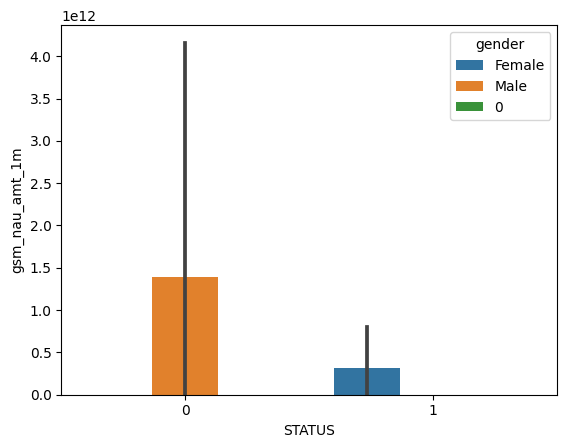

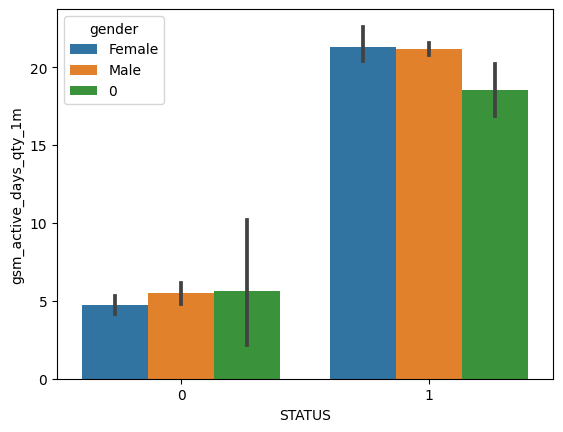

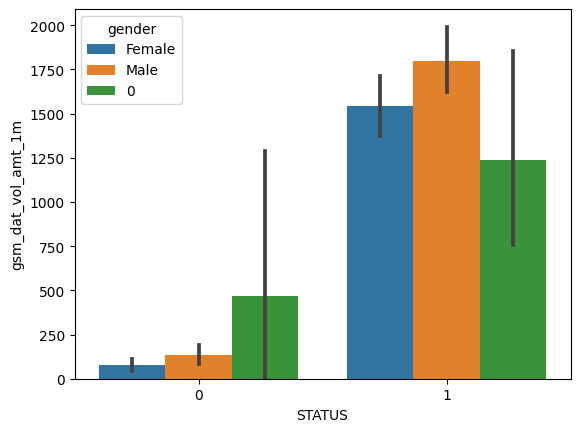

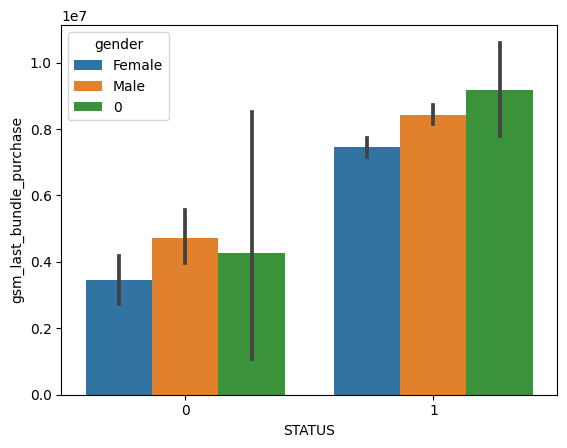

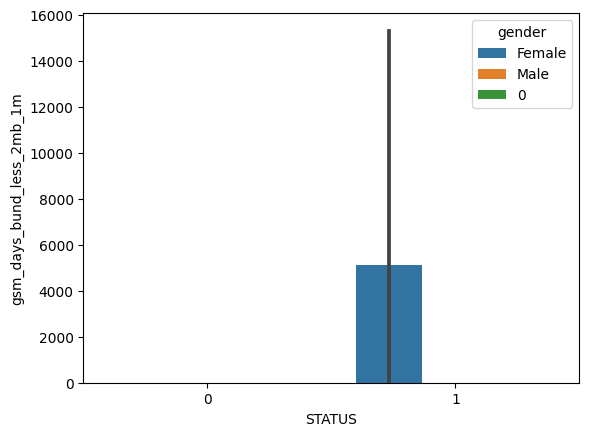

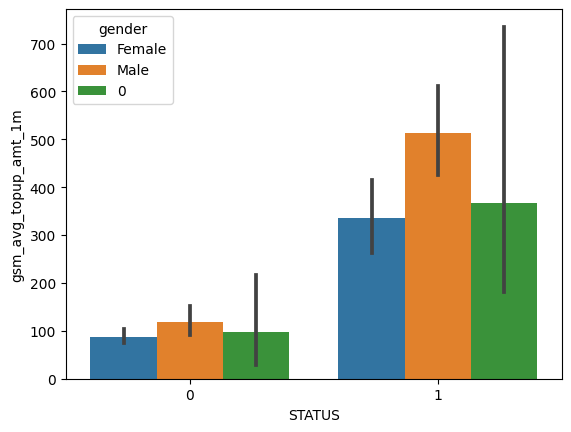

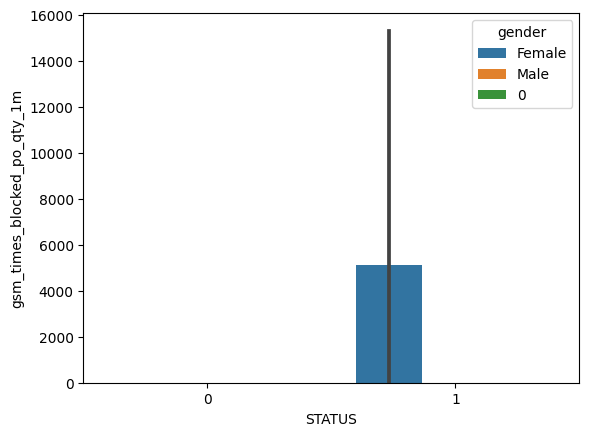

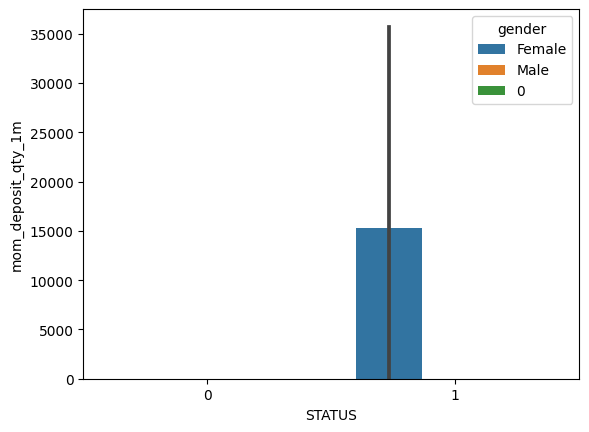

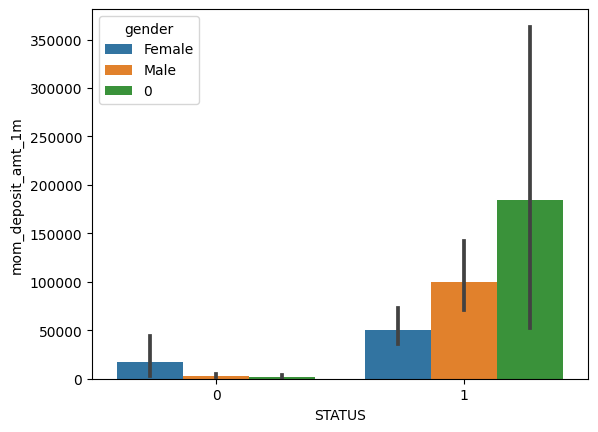

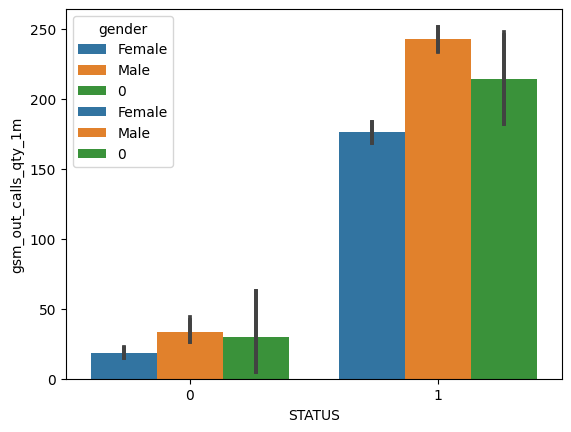

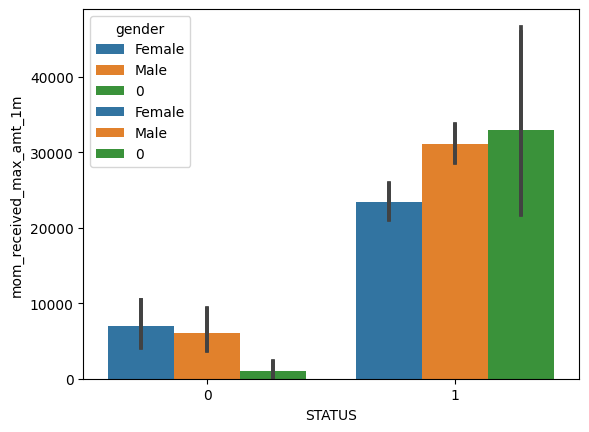

In [ ]:
# Active and inactive levels under various variables and the influence of gender the these levels


Attributes=["gsm_nau_amt_1m","gsm_active_days_qty_1m","gsm_out_calls_qty_1m","gsm_dat_vol_amt_1m","gsm_last_bundle_purchase","gsm_days_bund_less_2mb_1m","gsm_avg_topup_amt_1m","gsm_times_blocked_po_qty_1m","mom_received_max_amt_1m","mom_deposit_qty_1m","mom_deposit_amt_1m","gsm_out_calls_qty_1m","mom_received_max_amt_1m"]

for i in Attributes:
    plt.figure(i)
    sns.barplot(data=Mon,x="STATUS",y=i,hue="gender")

I am going to use various algorithms to see the best predictor of the customer status. I shall basically use three classifieers. The best model among which I shall deploy, could be used the model the churning rate. We shall know that the churning group here is represented by 0. These inactive customers shall have used the other telecommunication companies lines.

Reducing redundant variables

Consider the threshold of correlation coeficient that is at least 15% and use the your classifiers. These attributes include gsm_active_days_qty_1m, gsm_out_calls_qty_1m, 
mom_deposit_last_date, and mom_deposit_last_date.1.

In [ ]:
X = Mon.iloc[:, [5,6,11,15]].values
y = Mon.iloc[:, 18].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Fitting Logistic Regression to the Training set


classifier = LogisticRegression(random_state = 42, solver='lbfgs', multi_class='auto')

classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
# Predict probabilities

probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y

result = pd.DataFrame(probs_y, columns= np.unique(Mon.STATUS))
predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]
predicted_names = [np.unique(Mon.STATUS)[i] for i in predictedt_index]
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=predicted_names)

# 10 Sample results of a classifier

result.sample(10)

,Test,Predicted,0,1
1279,1,1,0.07,0.93
1282,1,1,0.07,0.93
586,1,1,0.07,0.93
375,1,1,0.07,0.93
1233,0,1,0.07,0.93
1494,1,1,0.07,0.93
1871,1,1,0.07,0.93
811,1,1,0.07,0.93
1248,1,1,0.07,0.93
1792,1,1,0.07,0.93


In [ ]:
# Confusion matrix

con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)


[[  59  116]
 [ 178 1647]]


This confusion matrix is promising. It shows that most of the responses have been classified perfectly. The number of missclassifed respones are very few, they are only 294 responses whereas 1706 responses have been predicted perfectly. This plays a vital role in showing that the model accuracy is good.

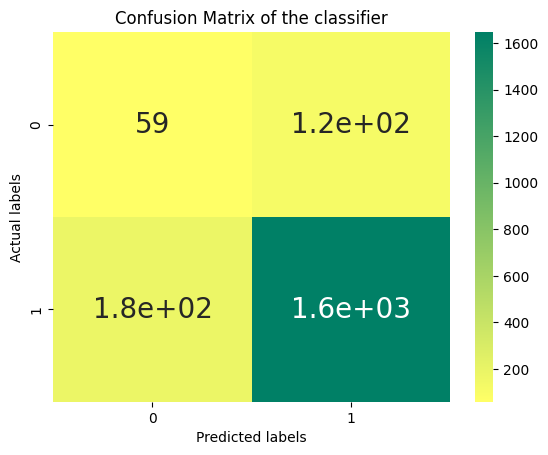

In [ ]:
# confusion matrix sns heatmap 

#ax = plt.axes()

sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(Mon.STATUS),
           yticklabels=np.unique(Mon.STATUS))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

The confusion matrix itself shows that the data is unbalanced. there are too many customers that are active relative to those ones who are inactive. This may help the telecommunication company to go on and improve the customer care so as to regain the inactive group to become the permanent users of the company services

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.853


The model has accurately managed to predict correctly the responses to the level of 85.3%

# 2. Decision tree

In [ ]:
# Important libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
X = Mon.iloc[:, [5,6,11,15]].values
y = Mon.iloc[:, 18].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Create Decision Tree classifer object


clf = DecisionTreeClassifier()

# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8965


The Decision tree model has accurately managed to predict correctly the responses to the level preference. This is better than the logistic regression score. 

# Decision tree visualization

In [ ]:
# Important libraries

from sklearn import tree

from sklearn import datasets

In [ ]:
The_Tree = tree.export_text(clf)

In [ ]:
print(The_Tree)

|--- feature_0 <= 3.50
|   |--- feature_3 <= 20220227.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 20220101.00
|   |   |   |   |--- feature_2 <= 20211107.00
|   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 20211014.00
|   |   |   |   |   |   |   |--- feature_2 <= 20210927.00
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 20210914.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 10105456.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  10105456.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  20210914.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 20210917.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  20210917.00
|   |   |

# 3. Randon forest 

In [ ]:
X = Mon.iloc[:, [5,6,11,15]].values
y = Mon.iloc[:, 18].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

classif = RandomForestRegressor(n_estimators=20, random_state=0)
classif.fit(X_train, y_train)
y_pred = classif.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


p=np.round(y_pred,0)
q=np.round(y_test,0)

R=pd.DataFrame({"Test": p, "Predicted": p})

R.head(10)


,Test,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
# Confusion matrix

print(confusion_matrix(q,p))


[[  63   93]
 [  80 1764]]


In [ ]:

print(classification_report(q,p))


              precision    recall  f1-score   support

           0       0.44      0.40      0.42       156
           1       0.95      0.96      0.95      1844

    accuracy                           0.91      2000
   macro avg       0.70      0.68      0.69      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
print(accuracy_score(q,p))

0.9135


# Random forest has become the best predictor of the responses. It is better than both logistic regression and decision tree. The reported accuracy level is about 91% whereas that of logistic regression was 85.3% and 89.65% for the decision tree.

In [ ]:
100*Mon['STATUS'].value_counts()/len(Mon['STATUS'])

1    90.73
0     9.27
Name: STATUS, dtype: float64

In a one month analysis of the customer charning, it is true that almost 9% are switching to other telecommunication lines whereas almost 91 % are not churning.

In [ ]:
Mon['STATUS'].value_counts()

1    9073
0     927
Name: STATUS, dtype: int64

91% of the customers who are not charning is represented by 9073 people whereas 9% is detailing the number of 927 charning people out of 10000.

# A three months customer churning analysis

In [ ]:
Month_three=M.drop(columns=["mom_deposit_amt_6m","mom_deposit_qty_6m","mom_received_max_amt_6m","gsm_times_blocked_po_qty_6m","gsm_avg_topup_amt_6m","gsm_days_bund_less_2mb_6m","gsm_dat_vol_amt_6m","gsm_out_calls_qty_6m","gsm_active_days_qty_6m","gsm_nau_amt_6m"])

In [ ]:
Month_three

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_3m,...,gsm_times_blocked_po_qty_3m,gsm_times_blocked_po_qty_1m,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,719.250000,222.750000,63.0,21.0,215,...,0.0,0.0,480.0,NaN,20211213.0,20220212.0,2.0,1.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,99.283334,0.000000,40.0,0.0,458,...,0.0,0.0,99750.0,4000.0,20220306.0,20220304.0,49.0,32.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,708.916666,274.833333,53.0,18.0,250,...,0.0,0.0,38000.0,38000.0,20220220.0,20211202.0,0.0,0.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,739.666666,0.000000,89.0,30.0,865,...,0.0,0.0,150000.0,23000.0,20220212.0,20220304.0,6.0,4.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,737.500000,232.750000,62.0,19.0,333,...,0.0,0.0,12350.0,NaN,20220101.0,20220220.0,10.0,5.0,72300.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,19.500000,0.000000,20.0,1.0,60,...,0.0,0.0,5000.0,NaN,20220128.0,20220304.0,4.0,1.0,124750.0,120000.0
9996,5970755,Male,xxx,24,T101,88.250000,0.000000,16.0,0.0,44,...,0.0,0.0,5000.0,5000.0,20220211.0,20220204.0,3.0,0.0,5400.0,0.0
9997,6976589,Male,Damien,1,T101,185.250000,15.000000,60.0,14.0,307,...,0.0,0.0,7200.0,NaN,20220122.0,20220204.0,6.0,0.0,15800.0,0.0
9998,15774287,Female,Julienne,0,IT2160,508.466667,186.900000,72.0,22.0,816,...,0.0,0.0,1700.0,1100.0,20220206.0,20211223.0,1.0,0.0,15000.0,0.0


In [ ]:
Month_three.isnull().sum() # Total number of missing values in One-month customer data

uniqueID                          0
gender                          206
FirstName                        15
Last_Activity_GSM                 0
Device                            2
gsm_nau_amt_3m                    1
gsm_nau_amt_1m                    1
gsm_active_days_qty_3m            0
gsm_active_days_qty_1m            0
gsm_out_calls_qty_3m              0
gsm_out_calls_qty_1m              0
gsm_dat_vol_amt_3m                0
gsm_dat_vol_amt_1m                0
gsm_last_bundle_purchase       6013
gsm_days_bund_less_2mb_3m      6314
gsm_days_bund_less_2mb_1m      6315
gsm_avg_topup_amt_3m            497
gsm_avg_topup_amt_1m           1064
mom_deposit_last_date            18
gsm_times_blocked_po_qty_3m       2
gsm_times_blocked_po_qty_1m       1
mom_received_max_amt_3m        1379
mom_received_max_amt_1m        2768
mom_received_last_date           35
mom_deposit_last_date.1          18
mom_deposit_qty_3m               18
mom_deposit_qty_1m               18
mom_deposit_amt_3m          

In [ ]:
Month_three_Non_null=Month_three.fillna(0)

# Filling with zero value in the missing value cells in a one month customer data

In [ ]:
Month_three_Non_null

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_3m,...,gsm_times_blocked_po_qty_3m,gsm_times_blocked_po_qty_1m,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,719.250000,222.750000,63.0,21.0,215,...,0.0,0.0,480.0,0.0,20211213.0,20220212.0,2.0,1.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,99.283334,0.000000,40.0,0.0,458,...,0.0,0.0,99750.0,4000.0,20220306.0,20220304.0,49.0,32.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,708.916666,274.833333,53.0,18.0,250,...,0.0,0.0,38000.0,38000.0,20220220.0,20211202.0,0.0,0.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,739.666666,0.000000,89.0,30.0,865,...,0.0,0.0,150000.0,23000.0,20220212.0,20220304.0,6.0,4.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,737.500000,232.750000,62.0,19.0,333,...,0.0,0.0,12350.0,0.0,20220101.0,20220220.0,10.0,5.0,72300.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,19.500000,0.000000,20.0,1.0,60,...,0.0,0.0,5000.0,0.0,20220128.0,20220304.0,4.0,1.0,124750.0,120000.0
9996,5970755,Male,xxx,24,T101,88.250000,0.000000,16.0,0.0,44,...,0.0,0.0,5000.0,5000.0,20220211.0,20220204.0,3.0,0.0,5400.0,0.0
9997,6976589,Male,Damien,1,T101,185.250000,15.000000,60.0,14.0,307,...,0.0,0.0,7200.0,0.0,20220122.0,20220204.0,6.0,0.0,15800.0,0.0
9998,15774287,Female,Julienne,0,IT2160,508.466667,186.900000,72.0,22.0,816,...,0.0,0.0,1700.0,1100.0,20220206.0,20211223.0,1.0,0.0,15000.0,0.0


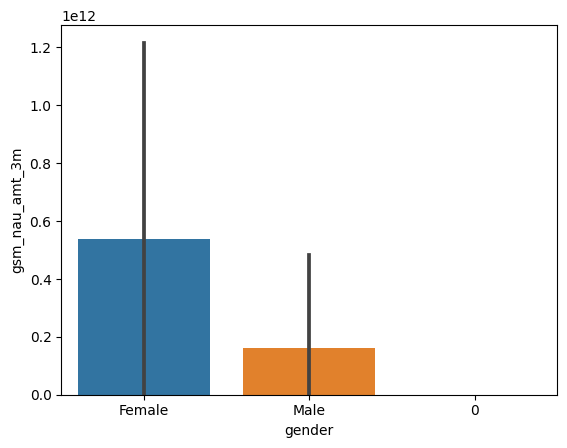

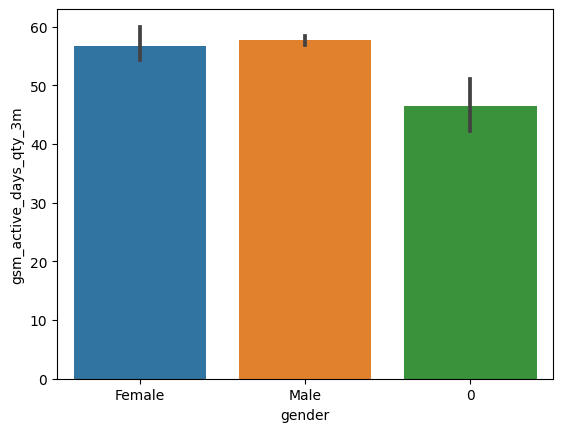

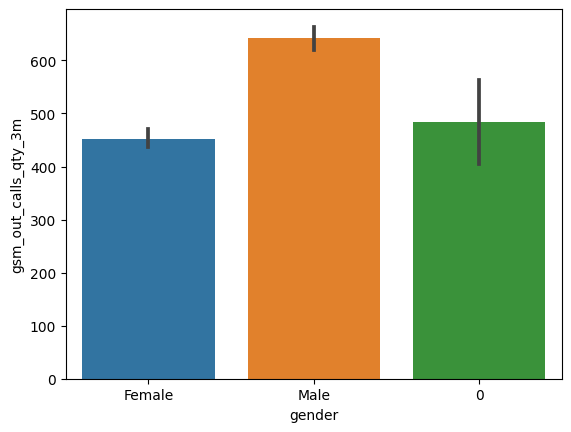

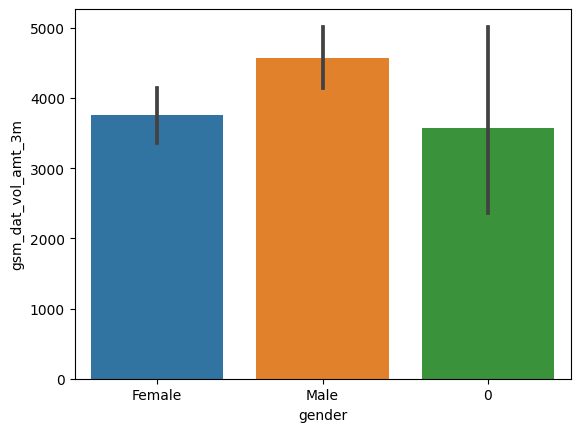

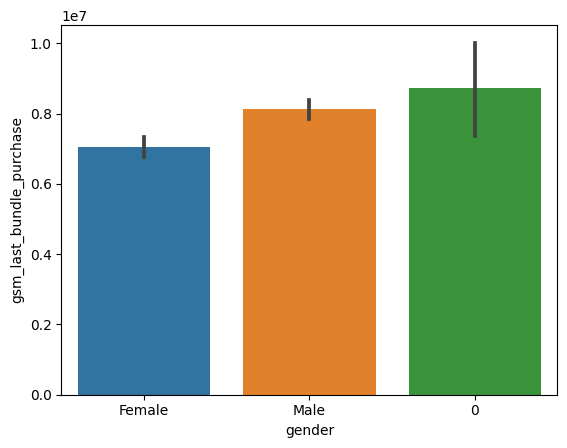

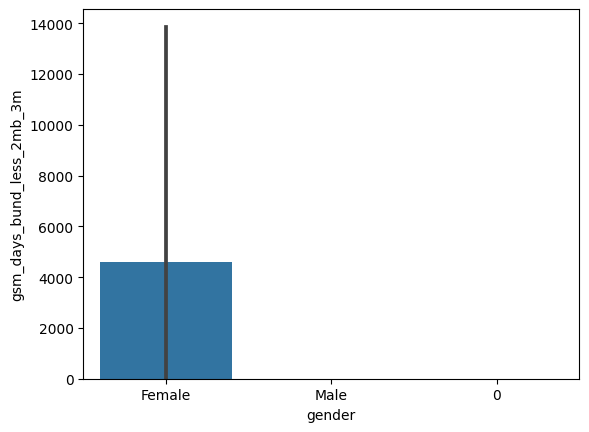

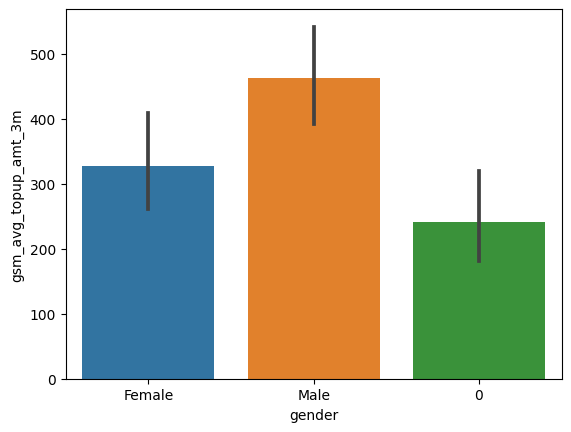

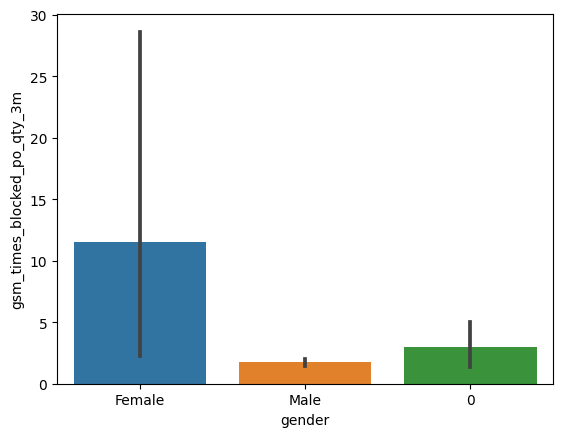

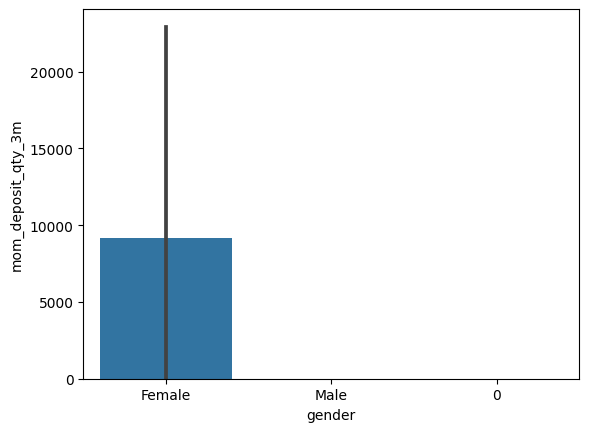

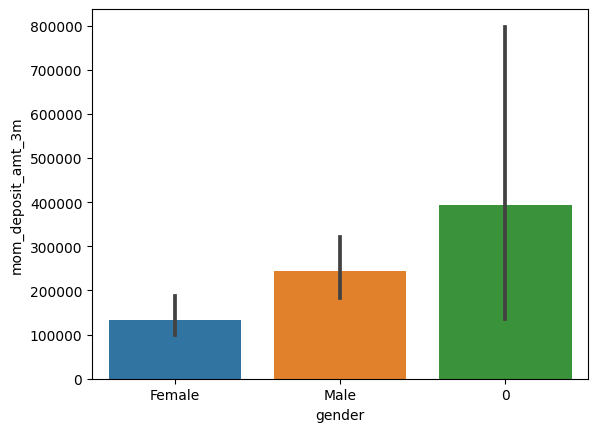

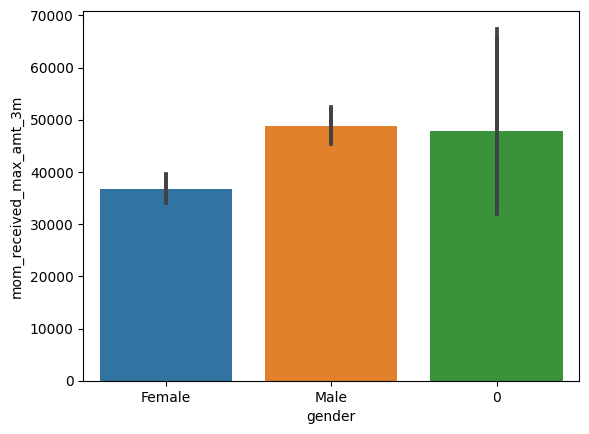

In [ ]:
# The influence of gender in 3 months subscribers utilization of telecommunication services

Amount1=["gsm_nau_amt_3m","gsm_active_days_qty_3m","gsm_out_calls_qty_3m","gsm_dat_vol_amt_3m","gsm_last_bundle_purchase","gsm_days_bund_less_2mb_3m","gsm_avg_topup_amt_3m","gsm_times_blocked_po_qty_3m","mom_received_max_amt_3m","mom_deposit_qty_3m","mom_deposit_amt_3m","mom_received_max_amt_3m"]

for i in Amount1:
    plt.figure(i)
    sns.barplot(data=Month_three_Non_null,x="gender",y=i)

In [ ]:
#  Response variable creation

s=Month_three_Non_null.Last_Activity_GSM.values

d=list(s)

# Changing the value of "PREPAID" to "0"

for i in range(len(d)):
    if d[i]=="PREPAID":
        d[i]="0"
    
# Changing the status of string characters to numerical values

for j in range(len(d)):
    if d[j] in ["0","1","2","3","4","5","6","7"]:
        d[j]=1
    else:
        d[j]=0

#Generating an array of decision variable

Status=np.array(d)

In [ ]:
Mon_3=Month_three_Non_null.drop(columns="Last_Activity_GSM")
Mon_3["CUSTOMER_STATUS"]=Status

Mon_3

,uniqueID,gender,FirstName,Device,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_3m,gsm_out_calls_qty_1m,...,gsm_times_blocked_po_qty_1m,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_3m,mom_deposit_amt_1m,CUSTOMER_STATUS
0,8947652,Female,"""VALENTINE """,T528,719.250000,222.750000,63.0,21.0,215,40,...,0.0,480.0,0.0,20211213.0,20220212.0,2.0,1.0,300.0,200.0,1
1,5997806,Female,Germaine,IT2160,99.283334,0.000000,40.0,0.0,458,0,...,0.0,99750.0,4000.0,20220306.0,20220304.0,49.0,32.0,124750.0,55750.0,1
2,8544861,Male,Jean De Dieu,T454,708.916666,274.833333,53.0,18.0,250,96,...,0.0,38000.0,38000.0,20220220.0,20211202.0,0.0,0.0,0.0,0.0,0
3,5284241,Male,Jean De Lapaix,RMX3231,739.666666,0.000000,89.0,30.0,865,291,...,0.0,150000.0,23000.0,20220212.0,20220304.0,6.0,4.0,251500.0,198500.0,1
4,197622,Male,Innocent,T301,737.500000,232.750000,62.0,19.0,333,98,...,0.0,12350.0,0.0,20220101.0,20220220.0,10.0,5.0,72300.0,16900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,T351,19.500000,0.000000,20.0,1.0,60,0,...,0.0,5000.0,0.0,20220128.0,20220304.0,4.0,1.0,124750.0,120000.0,1
9996,5970755,Male,xxx,T101,88.250000,0.000000,16.0,0.0,44,1,...,0.0,5000.0,5000.0,20220211.0,20220204.0,3.0,0.0,5400.0,0.0,0
9997,6976589,Male,Damien,T101,185.250000,15.000000,60.0,14.0,307,59,...,0.0,7200.0,0.0,20220122.0,20220204.0,6.0,0.0,15800.0,0.0,1
9998,15774287,Female,Julienne,IT2160,508.466667,186.900000,72.0,22.0,816,231,...,0.0,1700.0,1100.0,20220206.0,20211223.0,1.0,0.0,15000.0,0.0,1


In [ ]:
Mon_3.corr()

,uniqueID,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_3m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_3m,gsm_dat_vol_amt_1m,gsm_last_bundle_purchase,...,gsm_times_blocked_po_qty_1m,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_3m,mom_deposit_amt_1m,CUSTOMER_STATUS
uniqueID,1.000000,-0.010787,-0.005743,-0.164582,-0.158523,-0.238570,-0.215455,-0.109299,-0.100738,-0.153996,...,-0.014104,-0.217333,-0.190343,-0.081197,-0.203537,-0.021545,-0.019416,-0.058865,-0.047977,-0.158559
gsm_nau_amt_3m,-0.010787,1.000000,0.920903,0.725441,0.697775,-0.012517,-0.010652,-0.004617,-0.004365,-0.015494,...,0.390020,-0.007681,-0.006210,-0.055779,-0.053187,0.277295,0.839147,-0.001700,-0.001439,-0.011978
gsm_nau_amt_1m,-0.005743,0.920903,1.000000,0.664026,0.615950,-0.010887,-0.009083,-0.004231,-0.003892,-0.013525,...,0.000249,-0.006703,-0.005419,-0.048753,-0.046470,0.001834,0.666565,-0.001483,-0.001256,-0.014374
gsm_active_days_qty_3m,-0.164582,0.725441,0.664026,1.000000,0.969027,0.287993,0.277497,0.155432,0.162412,0.130396,...,0.291609,0.116350,0.105379,-0.003539,0.116235,0.201842,0.836902,0.032708,0.030061,0.155525
gsm_active_days_qty_1m,-0.158523,0.697775,0.615950,0.969027,1.000000,0.300843,0.347901,0.181966,0.210433,0.096568,...,0.334227,0.129063,0.128072,-0.062663,0.101725,0.281967,0.813222,0.040345,0.042775,0.183373
gsm_out_calls_qty_3m,-0.238570,-0.012517,-0.010887,0.287993,0.300843,1.000000,0.934148,0.244917,0.259628,0.190284,...,-0.006395,0.317428,0.289296,0.050769,0.202044,-0.009619,-0.010206,0.114744,0.100727,0.179364
gsm_out_calls_qty_1m,-0.215455,-0.010652,-0.009083,0.277497,0.347901,0.934148,1.000000,0.259373,0.296367,0.140376,...,-0.005873,0.309881,0.303298,-0.022173,0.174176,0.055743,-0.008565,0.124157,0.119986,0.191957
gsm_dat_vol_amt_3m,-0.109299,-0.004617,-0.004231,0.155432,0.181966,0.244917,0.259373,1.000000,0.923484,0.263411,...,-0.001851,0.249402,0.216535,-0.043258,0.077168,-0.003097,-0.003698,0.054863,0.050257,0.077360
gsm_dat_vol_amt_1m,-0.100738,-0.004365,-0.003892,0.162412,0.210433,0.259628,0.296367,0.923484,1.000000,0.221312,...,-0.002005,0.243866,0.214793,-0.079458,0.072162,-0.003262,-0.003539,0.055804,0.053233,0.077346
gsm_last_bundle_purchase,-0.153996,-0.015494,-0.013525,0.130396,0.096568,0.190284,0.140376,0.263411,0.221312,1.000000,...,-0.007800,0.145983,0.119983,0.196011,0.147322,-0.011054,-0.013515,0.028558,0.018280,0.115925


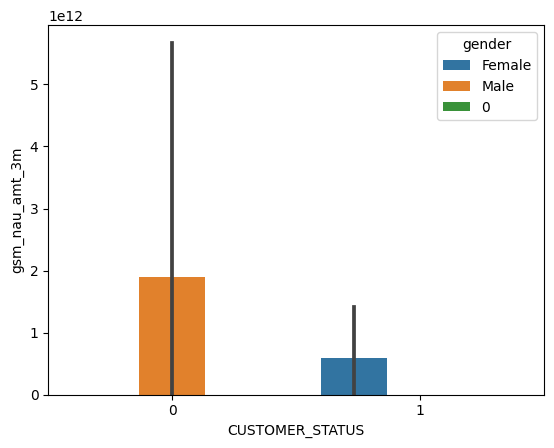

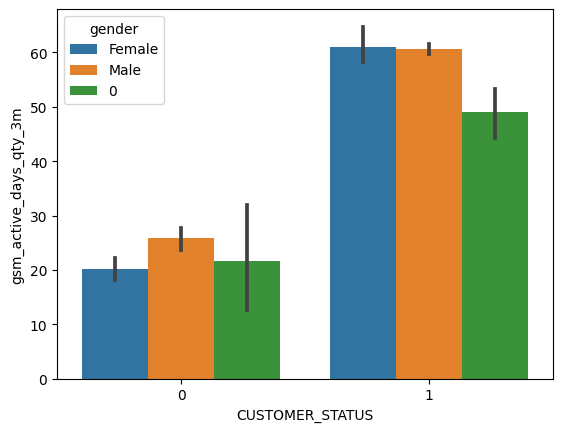

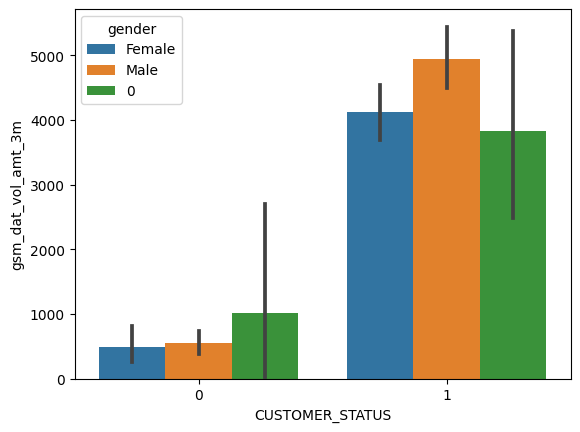

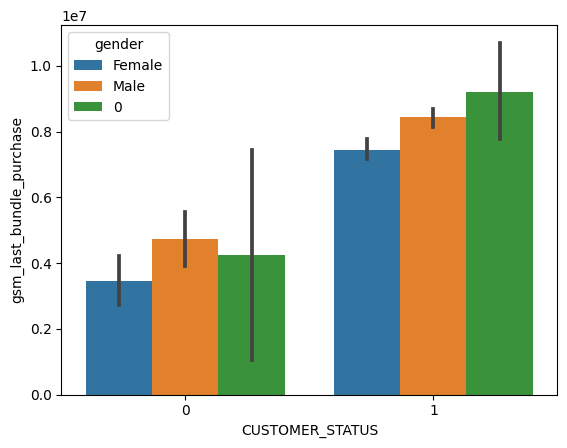

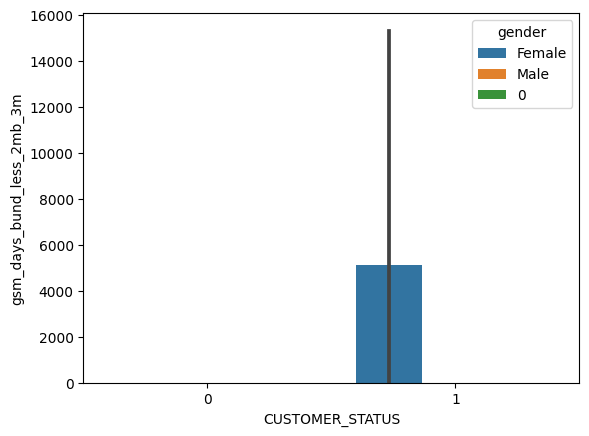

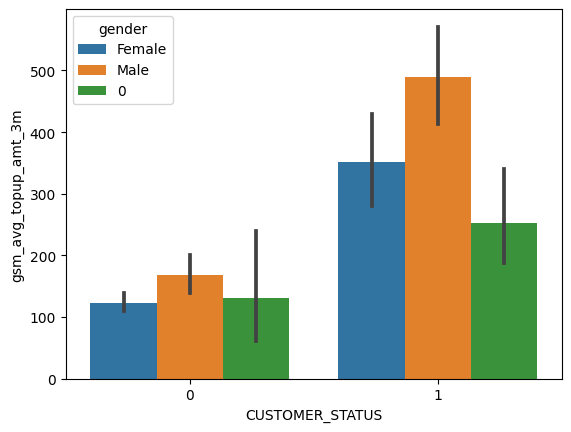

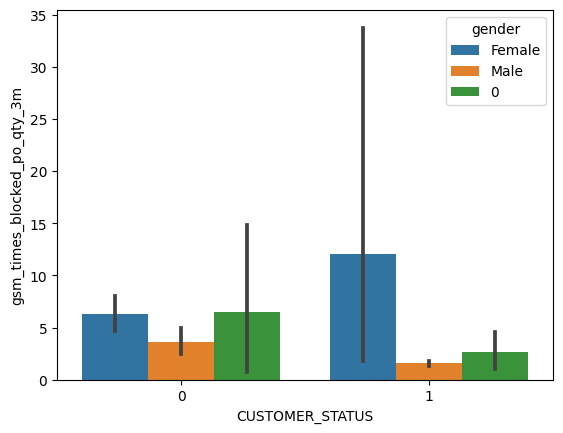

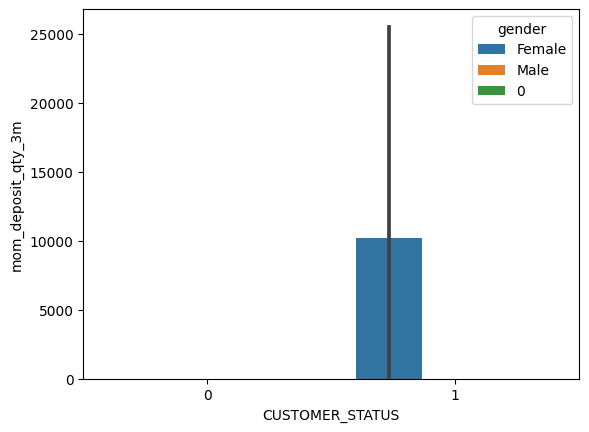

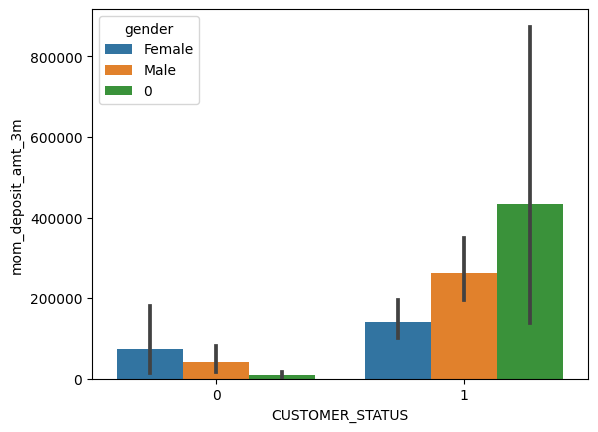

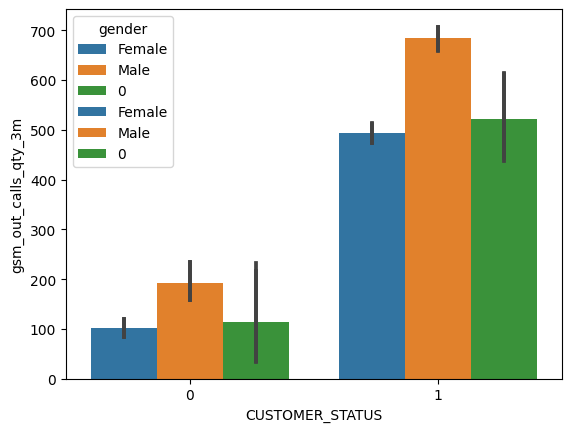

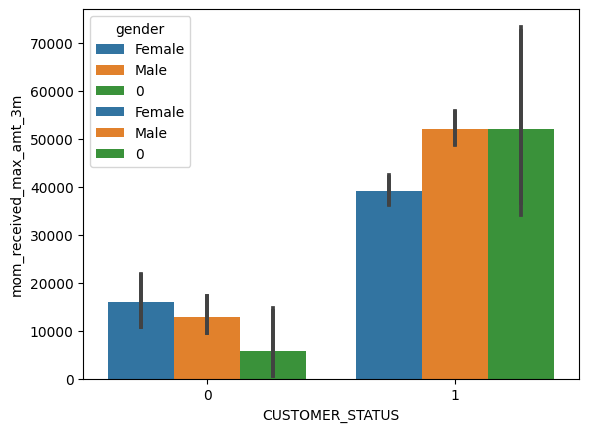

In [ ]:
Attributes=["gsm_nau_amt_3m","gsm_active_days_qty_3m","gsm_out_calls_qty_3m","gsm_dat_vol_amt_3m","gsm_last_bundle_purchase","gsm_days_bund_less_2mb_3m","gsm_avg_topup_amt_3m","gsm_times_blocked_po_qty_3m","mom_received_max_amt_3m","mom_deposit_qty_3m","mom_deposit_amt_3m","gsm_out_calls_qty_3m","mom_received_max_amt_3m"]

for i in Attributes:
    plt.figure(i)
    sns.barplot(data=Mon_3,x="CUSTOMER_STATUS",y=i,hue="gender")

# 1. Logistic regression 

In this modelling process, variables with correlation greater or equal to 10 percent are going to be used. These include: gsm_active_days_qty_3m, gsm_active_days_qty_1m, gsm_out_calls_qty_3m, gsm_out_calls_qty_1m, gsm_last_bundle_purchase, mom_received_last_date, and mom_deposit_last_date.1.  

In [ ]:
X = Mon_3.iloc[:, [6,7,8,9,12,22,27]].values
y = Mon_3.iloc[:, 28].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
# Predict probabilities

probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y

result = pd.DataFrame(probs_y, columns= np.unique(Mon_3.CUSTOMER_STATUS))
predictedt_index = [np.argmax(result.iloc[i,:]) for i in range(result.shape[0])]
predicted_names = [np.unique(Mon_3.CUSTOMER_STATUS)[i] for i in predictedt_index]
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=predicted_names)


result.sample(10)

,Test,Predicted,0,1
1425,1,1,0.03,0.97
1973,1,1,0.05,0.95
1355,1,0,0.50,0.50
230,1,1,0.12,0.88
867,1,1,0.13,0.87
415,0,1,0.13,0.87
900,1,1,0.04,0.96
1601,1,1,0.05,0.95
1856,1,1,0.13,0.87
213,0,1,0.12,0.88


In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

[[   7  149]
 [   9 1835]]


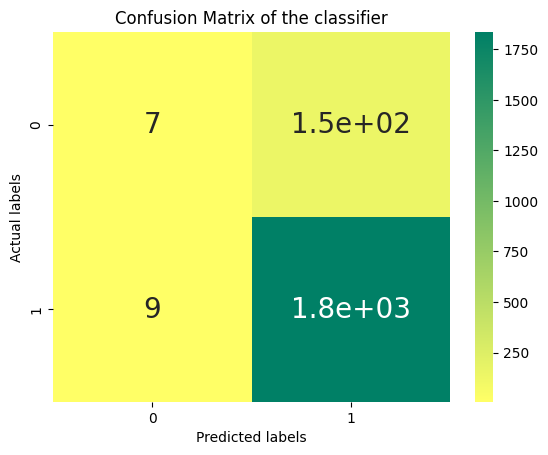

In [ ]:
# confusion matrix sns heatmap 
#ax = plt.axes()

sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(Mon_3.CUSTOMER_STATUS),
           yticklabels=np.unique(Mon_3.CUSTOMER_STATUS))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.921


 Logistic regression classifier has predicted actual response values by 92.1 % correctly.

# 2. Decision tree

In [ ]:
X = Mon_3.iloc[:, [6,7,8,9,12,22,27]].values
y = Mon_3.iloc[:, 28].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Create Decision Tree classifer object


clf = DecisionTreeClassifier(criterion="entropy", max_depth=15,random_state=0)

# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [ ]:
# Confusion matrix

print(metrics.confusion_matrix(y_test, y_pred))

[[  64   92]
 [  77 1767]]


In [ ]:
SAMPLe= pd.DataFrame({"Test": y_test,"Predicted":y_pred})

SAMPLe.head(10)

,Test,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.911


 Decision tree classifier has predicted actual response values by 91.1 % correctly.

# 3. Random forest

In [ ]:
X = Mon_3.iloc[:, [6,7,8,9,12,22,27]].values
y = Mon_3.iloc[:, 28].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classify = RandomForestRegressor(n_estimators=20, random_state=0)
classify.fit(X_train, y_train)
y_pred = classify.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


p=np.round(y_pred,0)
q=np.round(y_test,0)

R=pd.DataFrame({"Test": p, "Predicted": p})

R.head(10)

,Test,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [ ]:

print(classification_report(q,p))

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       175
           1       0.96      0.97      0.96      1825

    accuracy                           0.93      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
print(accuracy_score(q, p))

0.9295


Random forest is still the best algorithm to predict the status of the customer with 3 months of subscription period. It is now recommended to use it in classification problem due to its accuracy score.

In [ ]:
# Total numer of churning and non churning customers

Mon_3['CUSTOMER_STATUS'].value_counts()

1    9073
0     927
Name: CUSTOMER_STATUS, dtype: int64

In [ ]:
# The level of churning in percentage measure

100*Mon_3['CUSTOMER_STATUS'].value_counts()/len(Mon['STATUS'])

1    90.73
0     9.27
Name: CUSTOMER_STATUS, dtype: float64

# A six months customer churning analysis

In [ ]:
M

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_6m,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,...,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,1438.25,719.250000,222.750000,120.0,63.0,...,480.0,NaN,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,1574.033335,99.283334,0.000000,130.0,40.0,...,99750.0,4000.0,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,1577.899999,708.916666,274.833333,102.0,53.0,...,38000.0,38000.0,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,900.683333,739.666666,0.000000,147.0,89.0,...,150000.0,23000.0,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,1508.716667,737.500000,232.750000,125.0,62.0,...,12350.0,NaN,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,774.616667,19.500000,0.000000,73.0,20.0,...,5000.0,NaN,20220128.0,20220304.0,14.0,4.0,1.0,184750.0,124750.0,120000.0
9996,5970755,Male,xxx,24,T101,88.25,88.250000,0.000000,17.0,16.0,...,5000.0,5000.0,20220211.0,20220204.0,3.0,3.0,0.0,5400.0,5400.0,0.0
9997,6976589,Male,Damien,1,T101,477,185.250000,15.000000,103.0,60.0,...,7200.0,NaN,20220122.0,20220204.0,8.0,6.0,0.0,24300.0,15800.0,0.0
9998,15774287,Female,Julienne,0,IT2160,883.216667,508.466667,186.900000,138.0,72.0,...,1700.0,1100.0,20220206.0,20211223.0,2.0,1.0,0.0,16000.0,15000.0,0.0


In [ ]:
M.isnull().sum() # Total number of missing values in One-month customer data

uniqueID                          0
gender                          206
FirstName                        15
Last_Activity_GSM                 0
Device                            2
gsm_nau_amt_6m                  195
gsm_nau_amt_3m                    1
gsm_nau_amt_1m                    1
gsm_active_days_qty_6m            2
gsm_active_days_qty_3m            0
gsm_active_days_qty_1m            0
gsm_out_calls_qty_6m              0
gsm_out_calls_qty_3m              0
gsm_out_calls_qty_1m              0
gsm_dat_vol_amt_6m                0
gsm_dat_vol_amt_3m                0
gsm_dat_vol_amt_1m                0
gsm_last_bundle_purchase       6013
gsm_days_bund_less_2mb_6m      6300
gsm_days_bund_less_2mb_3m      6314
gsm_days_bund_less_2mb_1m      6315
gsm_avg_topup_amt_6m            284
gsm_avg_topup_amt_3m            497
gsm_avg_topup_amt_1m           1064
mom_deposit_last_date            18
gsm_times_blocked_po_qty_6m       5
gsm_times_blocked_po_qty_3m       2
gsm_times_blocked_po_qty_1m 

In [ ]:
M_6=M.fillna(0)
M_6

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_6m,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,...,mom_received_max_amt_3m,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m
0,8947652,Female,"""VALENTINE """,0,T528,1438.25,719.250000,222.750000,120.0,63.0,...,480.0,0.0,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0
1,5997806,Female,Germaine,1,IT2160,1574.033335,99.283334,0.000000,130.0,40.0,...,99750.0,4000.0,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0
2,8544861,Male,Jean De Dieu,11,T454,1577.899999,708.916666,274.833333,102.0,53.0,...,38000.0,38000.0,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0
3,5284241,Male,Jean De Lapaix,0,RMX3231,900.683333,739.666666,0.000000,147.0,89.0,...,150000.0,23000.0,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0
4,197622,Male,Innocent,1,T301,1508.716667,737.500000,232.750000,125.0,62.0,...,12350.0,0.0,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,774.616667,19.500000,0.000000,73.0,20.0,...,5000.0,0.0,20220128.0,20220304.0,14.0,4.0,1.0,184750.0,124750.0,120000.0
9996,5970755,Male,xxx,24,T101,88.25,88.250000,0.000000,17.0,16.0,...,5000.0,5000.0,20220211.0,20220204.0,3.0,3.0,0.0,5400.0,5400.0,0.0
9997,6976589,Male,Damien,1,T101,477,185.250000,15.000000,103.0,60.0,...,7200.0,0.0,20220122.0,20220204.0,8.0,6.0,0.0,24300.0,15800.0,0.0
9998,15774287,Female,Julienne,0,IT2160,883.216667,508.466667,186.900000,138.0,72.0,...,1700.0,1100.0,20220206.0,20211223.0,2.0,1.0,0.0,16000.0,15000.0,0.0


In [ ]:
r=M_6.gsm_nau_amt_6m

In [ ]:
print(type(r))

<class 'pandas.core.series.Series'>


In [ ]:
for s in range(len(r)):
    if r[s]==str:
        r[s]=float(s)

In [ ]:




for i in range(len(r)):
    if r[i]=="Rwanda":
        r[i]= 0

In [ ]:
UTILIZATION_6=pd.to_numeric(r)
UTILIZATION_6

0       1438.250000
1       1574.033335
2       1577.899999
3        900.683333
4       1508.716667
           ...     
9995     774.616667
9996      88.250000
9997     477.000000
9998     883.216667
9999    1770.500000
Name: gsm_nau_amt_6m, Length: 10000, dtype: float64

In [ ]:

AK=M_6.drop(columns="gsm_nau_amt_6m")
AK["UTILIZATION_6"]=UTILIZATION_6

In [ ]:
AK

,uniqueID,gender,FirstName,Last_Activity_GSM,Device,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,...,mom_received_max_amt_1m,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m,UTILIZATION_6
0,8947652,Female,"""VALENTINE """,0,T528,719.250000,222.750000,120.0,63.0,21.0,...,0.0,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0,1438.250000
1,5997806,Female,Germaine,1,IT2160,99.283334,0.000000,130.0,40.0,0.0,...,4000.0,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0,1574.033335
2,8544861,Male,Jean De Dieu,11,T454,708.916666,274.833333,102.0,53.0,18.0,...,38000.0,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0,1577.899999
3,5284241,Male,Jean De Lapaix,0,RMX3231,739.666666,0.000000,147.0,89.0,30.0,...,23000.0,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0,900.683333
4,197622,Male,Innocent,1,T301,737.500000,232.750000,125.0,62.0,19.0,...,0.0,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0,1508.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,3,T351,19.500000,0.000000,73.0,20.0,1.0,...,0.0,20220128.0,20220304.0,14.0,4.0,1.0,184750.0,124750.0,120000.0,774.616667
9996,5970755,Male,xxx,24,T101,88.250000,0.000000,17.0,16.0,0.0,...,5000.0,20220211.0,20220204.0,3.0,3.0,0.0,5400.0,5400.0,0.0,88.250000
9997,6976589,Male,Damien,1,T101,185.250000,15.000000,103.0,60.0,14.0,...,0.0,20220122.0,20220204.0,8.0,6.0,0.0,24300.0,15800.0,0.0,477.000000
9998,15774287,Female,Julienne,0,IT2160,508.466667,186.900000,138.0,72.0,22.0,...,1100.0,20220206.0,20211223.0,2.0,1.0,0.0,16000.0,15000.0,0.0,883.216667


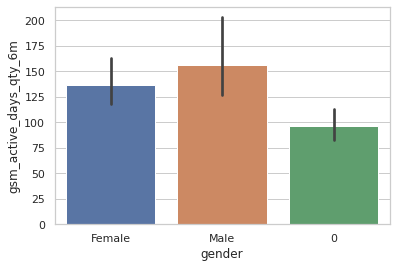

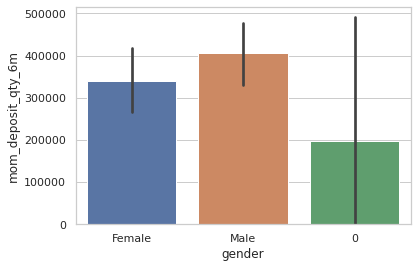

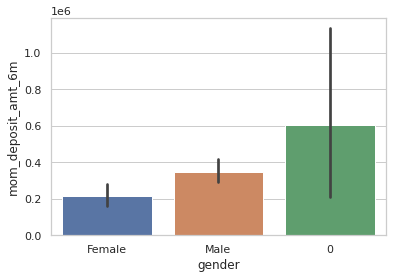

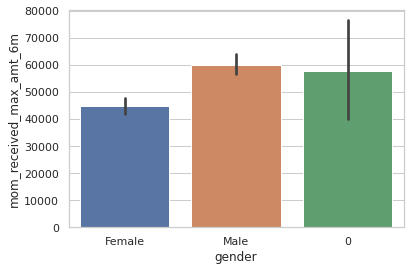

In [ ]:
Val= ["gsm_active_days_qty_6m","mom_deposit_qty_6m","mom_deposit_amt_6m","mom_received_max_amt_6m"]

for i in Val:
    plt.figure(i)
    sns.barplot(data=M_6,x="gender",y=i)

In [ ]:
#  Response variable creation

s=AK.Last_Activity_GSM.values

d=list(s)

# Changing the value of "PREPAID" to "0"

for i in range(len(d)):
    if d[i]=="PREPAID":
        d[i]="0"
    
# Changing the status of string characters to numerical values

for j in range(len(d)):
    if d[j] in ["0","1","2","3","4","5","6","7"]:
        d[j]=1
    else:
        d[j]=0

#Generating an array of decision variable

Status=np.array(d)

In [ ]:
AK_6=AK.drop(columns="Last_Activity_GSM")
AK_6["Response"]=Status

In [ ]:
AK_6

,uniqueID,gender,FirstName,Device,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_6m,...,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m,UTILIZATION_6,Response
0,8947652,Female,"""VALENTINE """,T528,719.250000,222.750000,120.0,63.0,21.0,390.0,...,20211213.0,20220212.0,6.0,2.0,1.0,12380.0,300.0,200.0,1438.250000,1
1,5997806,Female,Germaine,IT2160,99.283334,0.000000,130.0,40.0,0.0,1080.0,...,20220306.0,20220304.0,61.0,49.0,32.0,171400.0,124750.0,55750.0,1574.033335,1
2,8544861,Male,Jean De Dieu,T454,708.916666,274.833333,102.0,53.0,18.0,478.0,...,20220220.0,20211202.0,1.0,0.0,0.0,1000.0,0.0,0.0,1577.899999,0
3,5284241,Male,Jean De Lapaix,RMX3231,739.666666,0.000000,147.0,89.0,30.0,1282.0,...,20220212.0,20220304.0,12.0,6.0,4.0,508500.0,251500.0,198500.0,900.683333,1
4,197622,Male,Innocent,T301,737.500000,232.750000,125.0,62.0,19.0,662.0,...,20220101.0,20220220.0,12.0,10.0,5.0,75500.0,72300.0,16900.0,1508.716667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3927585,Female,Betty,T351,19.500000,0.000000,73.0,20.0,1.0,377.0,...,20220128.0,20220304.0,14.0,4.0,1.0,184750.0,124750.0,120000.0,774.616667,1
9996,5970755,Male,xxx,T101,88.250000,0.000000,17.0,16.0,0.0,44.0,...,20220211.0,20220204.0,3.0,3.0,0.0,5400.0,5400.0,0.0,88.250000,0
9997,6976589,Male,Damien,T101,185.250000,15.000000,103.0,60.0,14.0,418.0,...,20220122.0,20220204.0,8.0,6.0,0.0,24300.0,15800.0,0.0,477.000000,1
9998,15774287,Female,Julienne,IT2160,508.466667,186.900000,138.0,72.0,22.0,1680.0,...,20220206.0,20211223.0,2.0,1.0,0.0,16000.0,15000.0,0.0,883.216667,1


In [ ]:
AK_6.corr()

,uniqueID,gsm_nau_amt_3m,gsm_nau_amt_1m,gsm_active_days_qty_6m,gsm_active_days_qty_3m,gsm_active_days_qty_1m,gsm_out_calls_qty_6m,gsm_out_calls_qty_3m,gsm_out_calls_qty_1m,gsm_dat_vol_amt_6m,...,mom_received_last_date,mom_deposit_last_date.1,mom_deposit_qty_6m,mom_deposit_qty_3m,mom_deposit_qty_1m,mom_deposit_amt_6m,mom_deposit_amt_3m,mom_deposit_amt_1m,UTILIZATION_6,Response
uniqueID,1.000000,-0.010787,-0.005743,-0.034667,-0.164582,-0.158523,-0.236685,-0.238570,-0.215455,-0.095730,...,-0.081197,-0.203537,-0.104328,-0.021545,-0.019416,-0.079921,-0.058865,-0.047977,-0.021079,-0.158559
gsm_nau_amt_3m,-0.010787,1.000000,0.920903,0.451326,0.725441,0.697775,-0.010611,-0.012517,-0.010652,-0.004985,...,-0.055779,-0.053187,-0.002488,0.277295,0.839147,0.093986,-0.001700,-0.001439,0.188659,-0.011978
gsm_nau_amt_1m,-0.005743,0.920903,1.000000,0.475121,0.664026,0.615950,-0.008816,-0.010887,-0.009083,-0.004784,...,-0.048753,-0.046470,-0.002153,0.001834,0.666565,0.102568,-0.001483,-0.001256,-0.000236,-0.014374
gsm_active_days_qty_6m,-0.034667,0.451326,0.475121,1.000000,0.060631,0.085438,0.003310,0.113005,0.148247,0.004595,...,-0.080631,0.003144,0.172681,0.025875,0.019477,-0.000243,0.039865,0.044667,0.017907,-0.002724
gsm_active_days_qty_3m,-0.164582,0.725441,0.664026,0.060631,1.000000,0.969027,0.217190,0.287993,0.277497,0.099989,...,-0.003539,0.116235,0.180326,0.201842,0.836902,0.134951,0.032708,0.030061,0.134020,0.155525
gsm_active_days_qty_1m,-0.158523,0.697775,0.615950,0.085438,0.969027,1.000000,0.174725,0.300843,0.347901,0.083074,...,-0.062663,0.101725,0.305349,0.281967,0.813222,0.119795,0.040345,0.042775,0.216700,0.183373
gsm_out_calls_qty_6m,-0.236685,-0.010611,-0.008816,0.003310,0.217190,0.174725,1.000000,0.852580,0.704374,0.207611,...,0.210475,0.207988,-0.103890,-0.009541,-0.008009,0.183515,0.079775,0.055830,-0.009311,0.169267
gsm_out_calls_qty_3m,-0.238570,-0.012517,-0.010887,0.113005,0.287993,0.300843,0.852580,1.000000,0.934148,0.161813,...,0.050769,0.202044,0.257229,-0.009619,-0.010206,0.154599,0.114744,0.100727,-0.009408,0.179364
gsm_out_calls_qty_1m,-0.215455,-0.010652,-0.009083,0.148247,0.277497,0.347901,0.704374,0.934148,1.000000,0.129637,...,-0.022173,0.174176,0.384844,0.055743,-0.008565,0.129116,0.124157,0.119986,0.071239,0.191957
gsm_dat_vol_amt_6m,-0.095730,-0.004985,-0.004784,0.004595,0.099989,0.083074,0.207611,0.161813,0.129637,1.000000,...,0.082641,0.075169,-0.036018,-0.002598,-0.004043,0.084225,0.045265,0.036597,-0.002627,0.073295


The models that we have used on a 1 and 3 months customers have revealed that decision tree and random forest are somehow far accurate compared to logistic regression.

# 1. Decision tree

In [ ]:
X = AK_6.iloc[:, [7,8,9,10,11,29,30]].values
y = AK_6.iloc[:, 38].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Create Decision Tree classifer object


clf = DecisionTreeClassifier(criterion="entropy", max_depth=15,random_state=0)

# Train Decision Tree Classifer

clf = clf.fit(X_train,y_train)

#Predict the response for test dataset

y_pred = clf.predict(X_test)

In [ ]:
# Confusion matrix

Crm=metrics.confusion_matrix(y_test, y_pred)
Crm

array([[  88,   87],
       [  67, 1758]])

In [ ]:
SAMPLe_R= pd.DataFrame({"Test": y_test,"Predicted":y_pred})

SAMPLe_R.head(20)

,Test,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,1
9,1,1


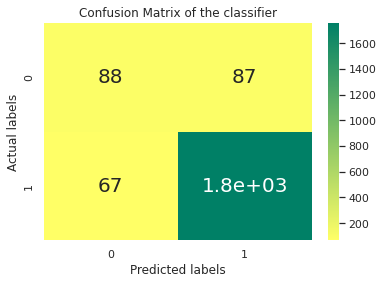

In [ ]:
# confusion matrix sns heatmap 


sns.heatmap(Crm, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(Mon_3.CUSTOMER_STATUS),
           yticklabels=np.unique(Mon_3.CUSTOMER_STATUS))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.923


The model is accurately clasifying the responses by 92.3 %. It is a good accuracy score.

# 2. Random forest


In [ ]:
X = AK_6.iloc[:, [7,8,9,10,11,29,30]].values
y = AK_6.iloc[:, 38].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifiers = RandomForestRegressor(n_estimators=20, random_state=0)
classifiers.fit(X_train, y_train)
y_pred = classifiers.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


p=np.round(y_pred,0)
q=np.round(y_test,0)

R=pd.DataFrame({"Test": p, "Predicted": p})

R.head(10)

,Test,Predicted
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
print(classification_report(q,p))

              precision    recall  f1-score   support

           0       0.68      0.58      0.63       175
           1       0.96      0.97      0.97      1825

    accuracy                           0.94      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.94      0.94      0.94      2000



In [ ]:
crmx=confusion_matrix(q,p)
crmx

array([[ 102,   73],
       [  49, 1776]])

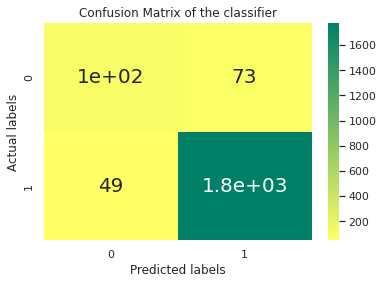

In [ ]:
# confusion matrix sns heatmap 


sns.heatmap(crmx, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(Mon_3.CUSTOMER_STATUS),
           yticklabels=np.unique(Mon_3.CUSTOMER_STATUS))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
print(accuracy_score(q, p))

0.939


The best accuracy score that we have got is approximately 94% in a 6 month subscriber of a telecommunication company under the random forest algorithm.

# General Churning decision and Insights from modelling aspects

1. The level of churning is different relative to gender. Female gender has high level of churning in each level of subscription period.

2. The one month customers are free to go customers. This may imply that the number of days for subscription infuences churning at high level.

2. Six months subscribers have been proven to churn less compared to other groups of 1 and 3 months subscription period.

4. The data is unbalanced where almost 91% are non churning subscribers (customers), whereas 9% is the number of churning population of the whole population that is 10000 in this modelling process.

5. The six months subscribers are more significant in terms of taking decisions of innovating the services provided to the customers.